# Task 2
In this task we have to plot the change of OECD countries population in the period of 2009-2019.

In [1]:
# Template code to load data
import pandas as pd

imf_data = pd.read_pickle("IMF_DATA.pkl")

# Next there is a list of OECD countries in 2020, note that Brazil, China, 
# India, Indonesia and South Africa are not in the list, because they are only
# Participating partners and not full members.
# Also Dependent Territories of member states are not included in this list.

OECD_countries = ['Australia', 'Austria', 'Belgium',
                    'Canada', 'Chile', 'Colombia',
                    'Costa Rica', 'Czech Republic', 'Denmark',
                    'Estonia', 'Finland', 'France', 'Germany',
                    'Greece', 'Hungary', 'Iceland', 'Ireland',
                    'Israel', 'Italy', 'Japan', 'South Korea',
                    'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
                    'Netherlands', 'New Zealand', 'Norway'
                    'Poland', 'Portugal', 'Slovakia', 'Slovenia',
                    'Spain', 'Sweden', 'Switzerland', 'Turkey',
                    'United Kingdom', 'United States']

population_pattern = r'Population'
pop_data = imf_data[(imf_data['Subject Descriptor'].fillna('Missing')).str.contains(population_pattern)]

In [2]:
# Note that population is scaled in millions
pop_data = pop_data[pop_data['Country'].isin(OECD_countries)]

In [3]:
# Here im thinking of removing the estimated data as it would interfere with calculating what countries population
# grew the most. 
def remove_predictions(row):
    DATA_END_DATE = 2019
    DATA_START_DATE = 2009
    prediction_start_year = int(row['Estimates Start After'])

    if prediction_start_year < DATA_START_DATE:
        row.loc[DATA_START_DATE : DATA_END_DATE] = 0.0
    elif prediction_start_year < DATA_END_DATE:
        last_number_before_predictions = row[prediction_start_year]
        row.loc[prediction_start_year + 1 : DATA_END_DATE] = last_number_before_predictions
        
    return row

# Applying the predictions removal function, changing data type to float64 and multiplying by 1,000,000
pop_data.set_index('Country', inplace = True)
pop_data = pop_data.apply(remove_predictions, axis = 1)
pop_data = pop_data.loc[:, 2009 : 2019]

In [4]:
import seaborn as sns

pop_data = pop_data.reset_index()

In [5]:
# Changing data to from wide to long
pop_data_long = pop_data.melt(id_vars='Country', var_name='Year', value_name='Population')

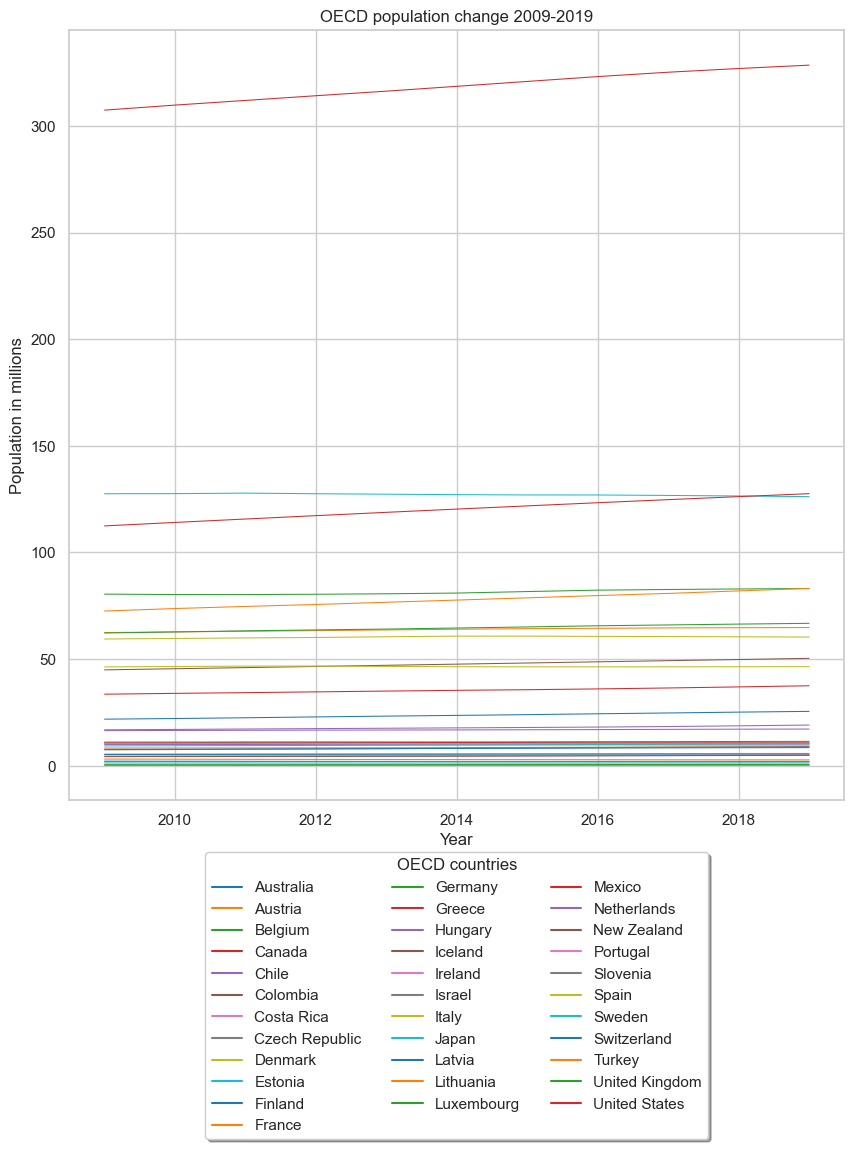

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(data = pop_data_long, x='Year', y='Population', palette="tab10", linewidth=.75, hue = 'Country')
plt.legend(title='OECD countries', loc='lower center', bbox_to_anchor=(0.5, -.45),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Population in millions')
plt.title('OECD population change 2009-2019')
plt.grid(True)
plt.show()